In [1]:
import numpy as np
import pandas as pd
import os 
import time
import deepdish.io as dd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from svi import SVI
import models as m
import datasets as d

# Load and Prepare Data

In [2]:
data = dd.load("sequenced_data_for_VAE_lenght-160_stride-10.h5")

In [3]:
X,y = data["X"], data["y"]

In [4]:
X

tensor([[0.1872, 0.1890, 0.1805,  ..., 0.1791, 0.1756, 0.1754],
        [0.1980, 0.1989, 0.1974,  ..., 0.1850, 0.1930, 0.1860],
        [0.2103, 0.2107, 0.2080,  ..., 0.1960, 0.2044, 0.2041],
        ...,
        [0.4694, 0.4644, 0.4707,  ..., 0.4877, 0.4774, 0.4771],
        [0.5260, 0.5163, 0.5141,  ..., 0.4935, 0.5005, 0.5110],
        [0.5704, 0.5643, 0.5629,  ..., 0.5024, 0.4991, 0.5269]],
       dtype=torch.float64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=666)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

# Model setup

In [9]:
torch.cuda.is_available()

True

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [11]:
deepmodel = m.DeepDenseVAE_mark_II(original_dim=160, latent_dim=15, encoder_dims=[256, 128])
svi = SVI(
        vae_model=deepmodel,
        optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-3),
        loss_function="GaussianNLL",
        verbose=True
        )

In [12]:
#svi.optimizer = torch.optim.Adam(svi.model.parameters(), lr=1e-3)

In [13]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:53.5251, validation_loss:-5.3260
Epoch [2/50], average_loss:-34.7235, validation_loss:-59.9331
Epoch [3/50], average_loss:-71.2144, validation_loss:-62.8374
Epoch [4/50], average_loss:-84.9984, validation_loss:-69.0348
Epoch [5/50], average_loss:-93.4645, validation_loss:-99.0937
Epoch [6/50], average_loss:-101.1896, validation_loss:-96.9579
Epoch [7/50], average_loss:-104.6430, validation_loss:-107.5301
Epoch [8/50], average_loss:-110.2253, validation_loss:-115.2914
Epoch [9/50], average_loss:-117.8457, validation_loss:-127.2374
Epoch [10/50], average_loss:-116.1622, validation_loss:-125.9082
Epoch [11/50], average_loss:-124.4294, validation_loss:-131.1662
Epoch [12/50], average_loss:-124.2188, validation_loss:-136.1661
Epoch [13/50], average_loss:-130.9100, validation_loss:-130.4397
Epoch [14/50], average_loss:-132.4228, validation_loss:-130.9798
Epoch [15/50], average_loss:-127.8808, validation_loss:-135.5199
Epoch [16/50], average_loss:-141.4308, validati

In [18]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-168.4477, validation_loss:-158.3289
Epoch [2/50], average_loss:-162.8231, validation_loss:-170.0712
Epoch [3/50], average_loss:-167.2576, validation_loss:-161.9698
Epoch [4/50], average_loss:-165.8210, validation_loss:-170.6579
Epoch [5/50], average_loss:-169.9177, validation_loss:-162.1175
Epoch [6/50], average_loss:-158.2416, validation_loss:-160.4583
Epoch [7/50], average_loss:-166.7748, validation_loss:-168.0191
Epoch [8/50], average_loss:-166.8429, validation_loss:-154.4366
Epoch [9/50], average_loss:-166.0275, validation_loss:-169.6971
Epoch [10/50], average_loss:-169.5167, validation_loss:-151.9590
Epoch [11/50], average_loss:-166.3382, validation_loss:-164.5964
Epoch [12/50], average_loss:-168.7136, validation_loss:-148.3787
Epoch [13/50], average_loss:-167.3668, validation_loss:-160.4410
Epoch [14/50], average_loss:-173.1654, validation_loss:-169.1219
Epoch [15/50], average_loss:-168.9355, validation_loss:-165.1723
Epoch [16/50], average_loss:-170.5

In [26]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-176.1240, validation_loss:-168.3516
Epoch [2/50], average_loss:-177.0187, validation_loss:-175.0273
Epoch [3/50], average_loss:-173.8835, validation_loss:-170.4506
Epoch [4/50], average_loss:-177.9078, validation_loss:-169.9563
Epoch [5/50], average_loss:-175.9918, validation_loss:-175.7653
Epoch [6/50], average_loss:-175.3141, validation_loss:-177.2432
Epoch [7/50], average_loss:-173.4119, validation_loss:-157.6141
Epoch [8/50], average_loss:-178.6543, validation_loss:-174.4430
Epoch [9/50], average_loss:-178.1457, validation_loss:-158.0811
Epoch [10/50], average_loss:-176.7661, validation_loss:-171.9600
Epoch [11/50], average_loss:-177.0477, validation_loss:-178.2970
Epoch [12/50], average_loss:-175.1714, validation_loss:-171.5330
Epoch [13/50], average_loss:-177.8881, validation_loss:-167.0895
Epoch [14/50], average_loss:-179.3040, validation_loss:-171.5615
Epoch [15/50], average_loss:-172.8387, validation_loss:-169.9303
Epoch [16/50], average_loss:-176.0

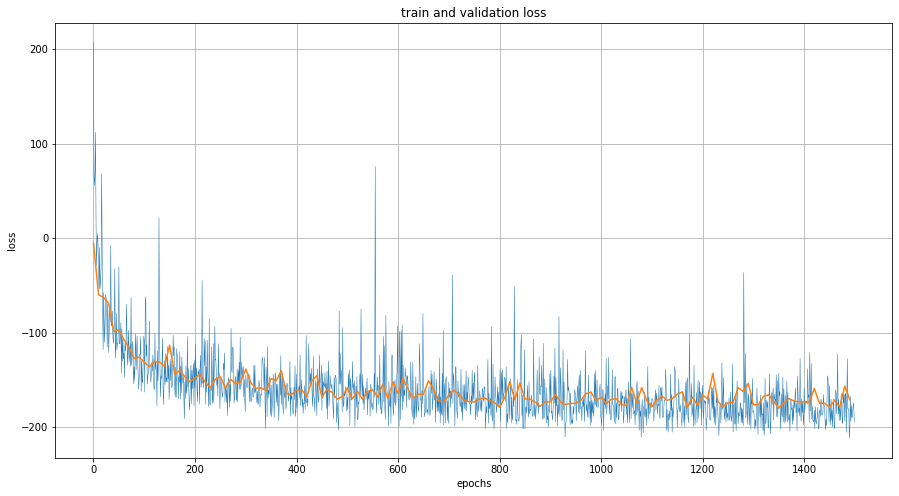

In [27]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"]))*10, svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [32]:
#torch.save(svi.model, "VAE_saves_and_logs/DeepDenseVAE_mark_II_[160-256-128-15]_VDO_GNLL_150ep_lr-1e-3.pt")
#torch.save(svi.optimizer, "VAE_saves_and_logs/DeepDenseVAE_mark_II_[160-256-128-15]__VDO_GNLL_150ep_lr-1e-3_optimizer.pt")
#dd.save("VAE_saves_and_logs/DeepDenseVAE_mark_II_[160-256-128-15]_VDO_GNLL_150ep_lr-1e-3_loss_history.h5", svi.loss_history)

# Evaluation

cuda:0


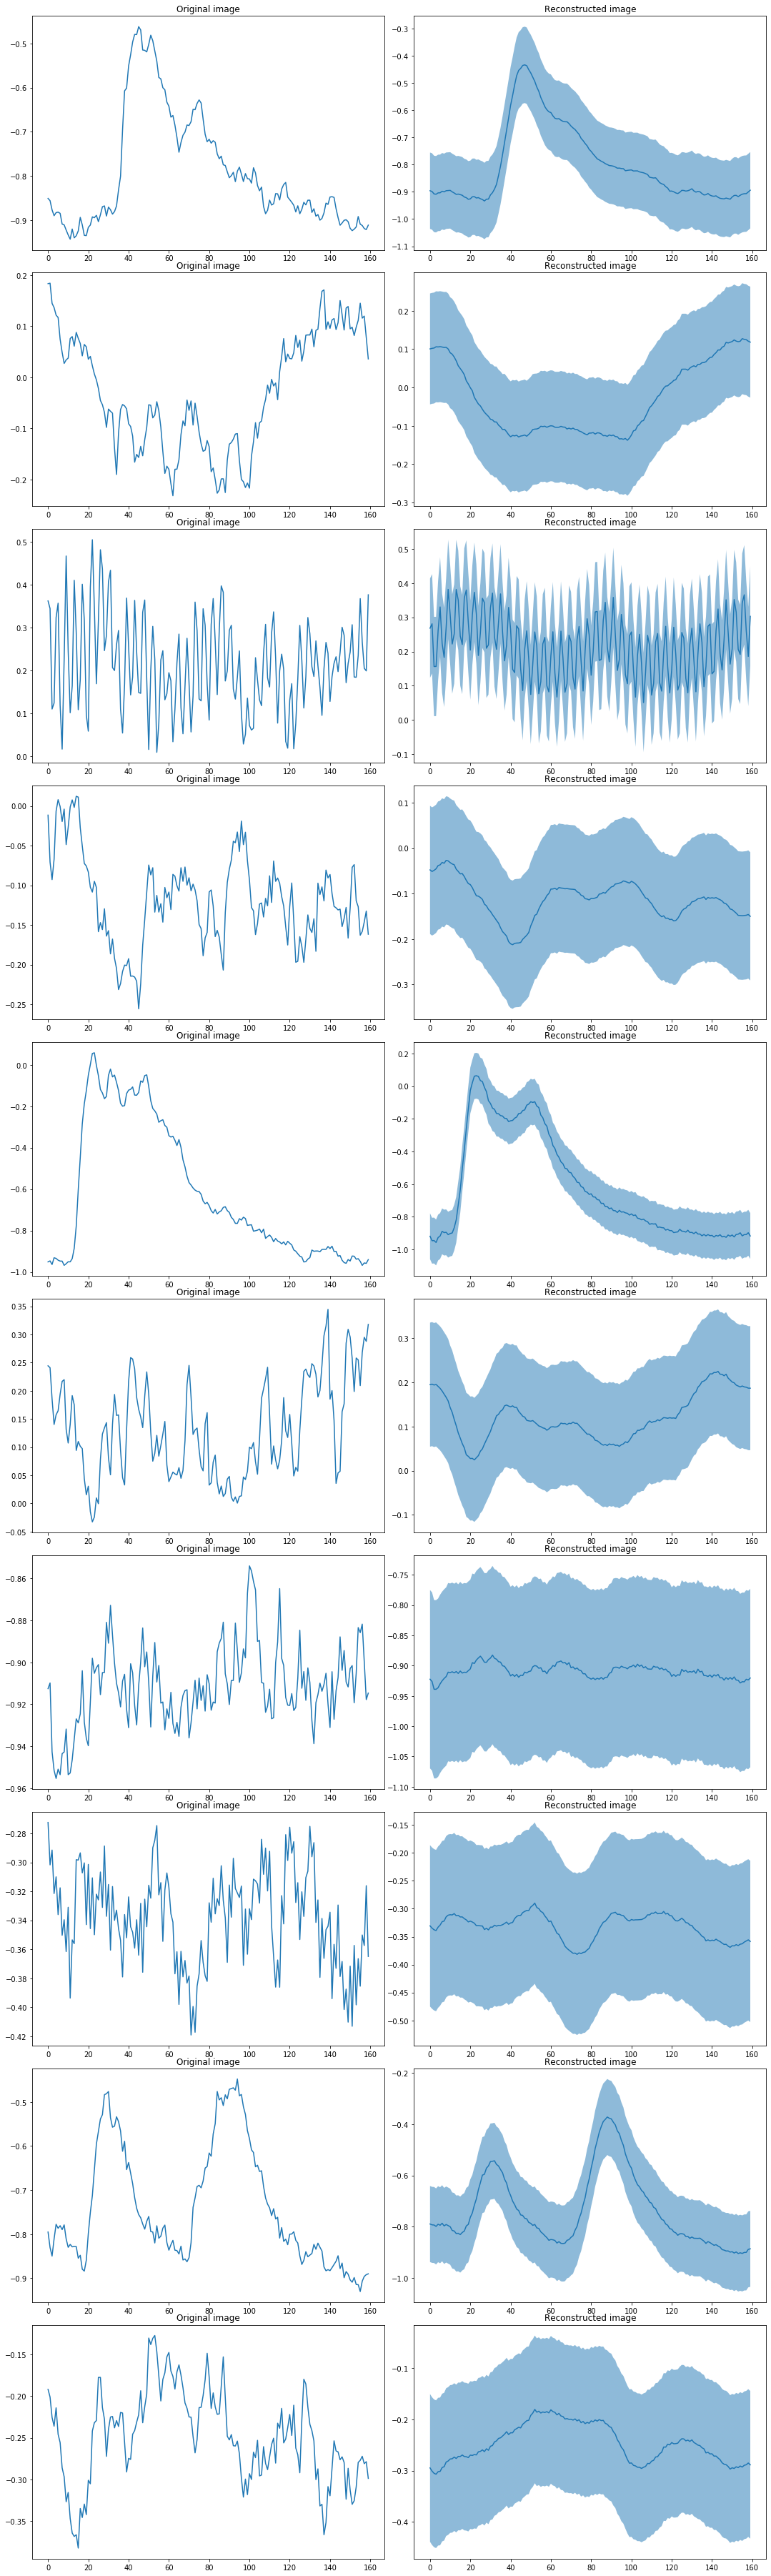

In [30]:
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

# Load Model

In [33]:
mod = torch.load("VAE_saves_and_logs/DeepDenseVAE_mark_II_[160-256-128-15]_VDO_GNLL_150ep_lr-1e-3.pt")

In [34]:
mod.eval()

DeepDenseVAE_mark_II(
  (encoder): Sequential(
    (0): Flatten()
    (1): Linear(in_features=160, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): VariationalLayer(
      (mu): Linear(in_features=128, out_features=15, bias=True)
      (rho): Linear(in_features=128, out_features=15, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): VariationalDecoderOutput(
      (mu): Linear(in_features=256, out_features=160, bias=True)
      (rho): Linear(in_features=256, out_features=1, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
)

cuda:0


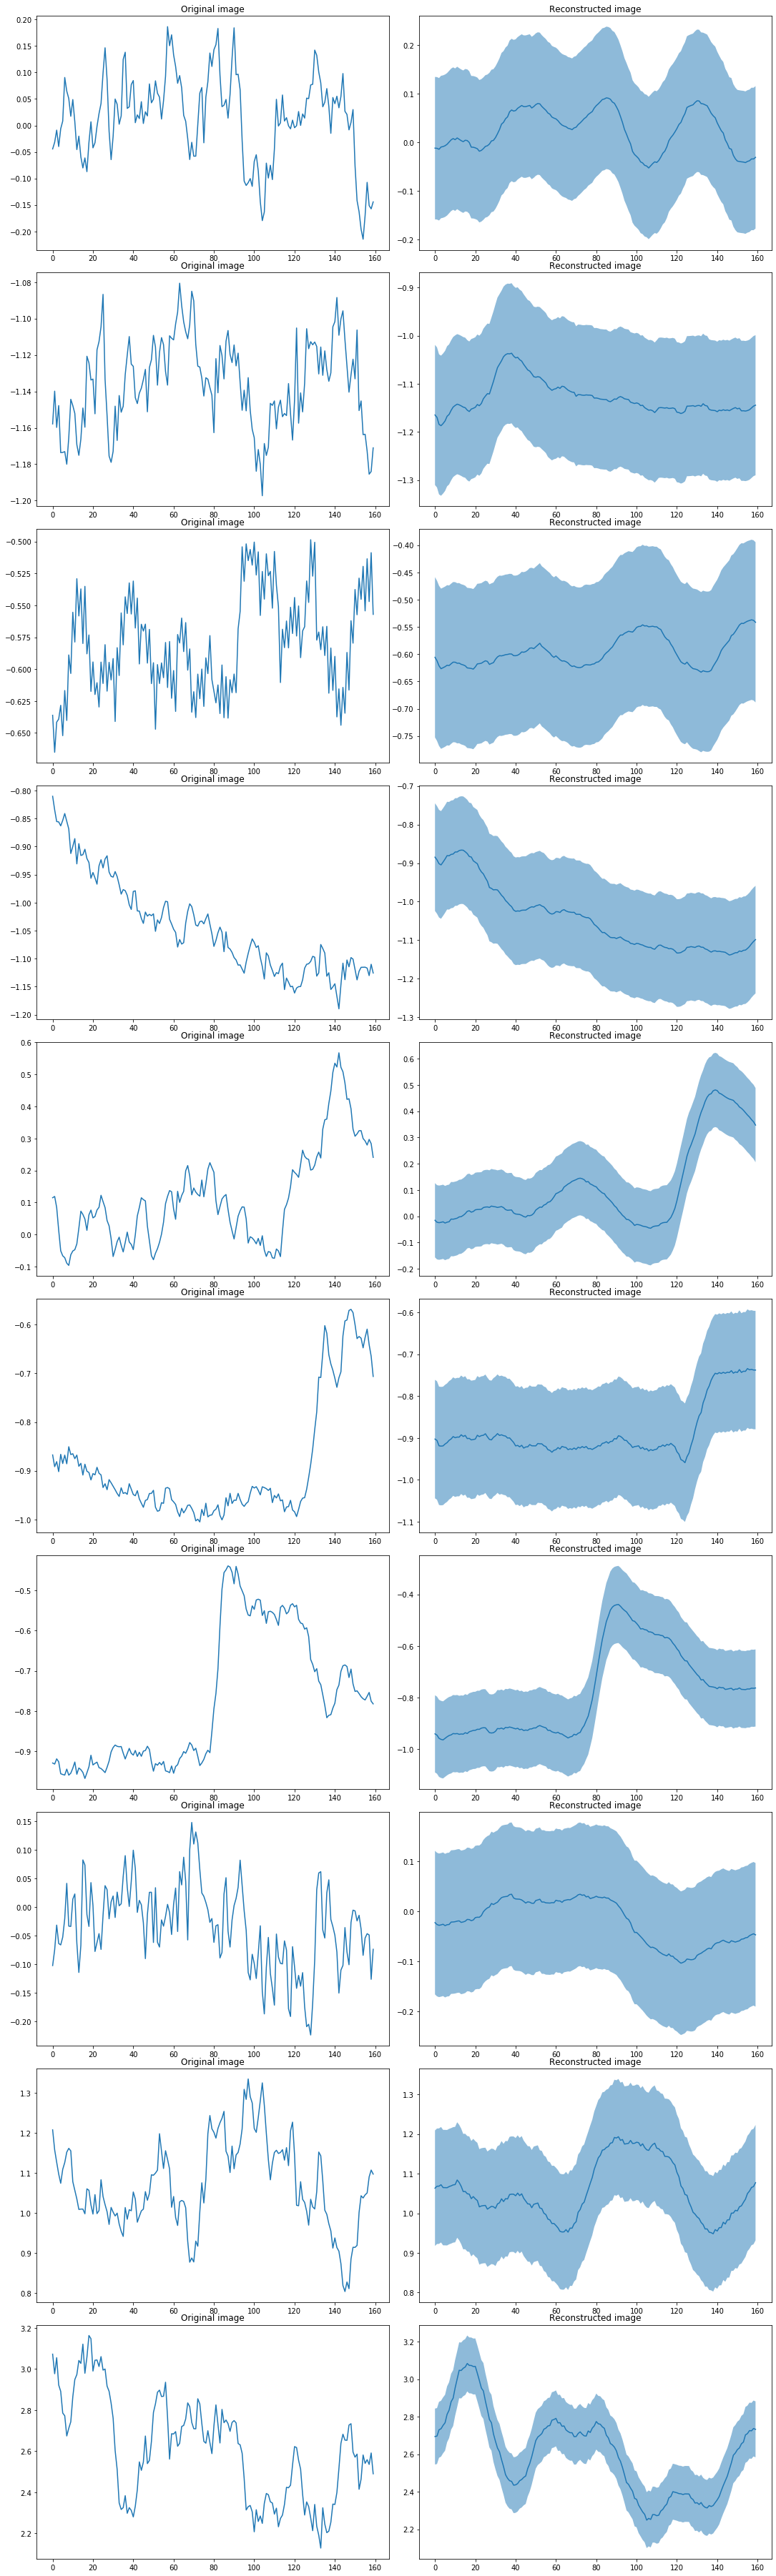

In [35]:
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = mod(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

In [39]:
from mpl_toolkits.mplot3d import Axes3D

In [37]:
z, mu, sigma = mod.encoder(X.to(device))

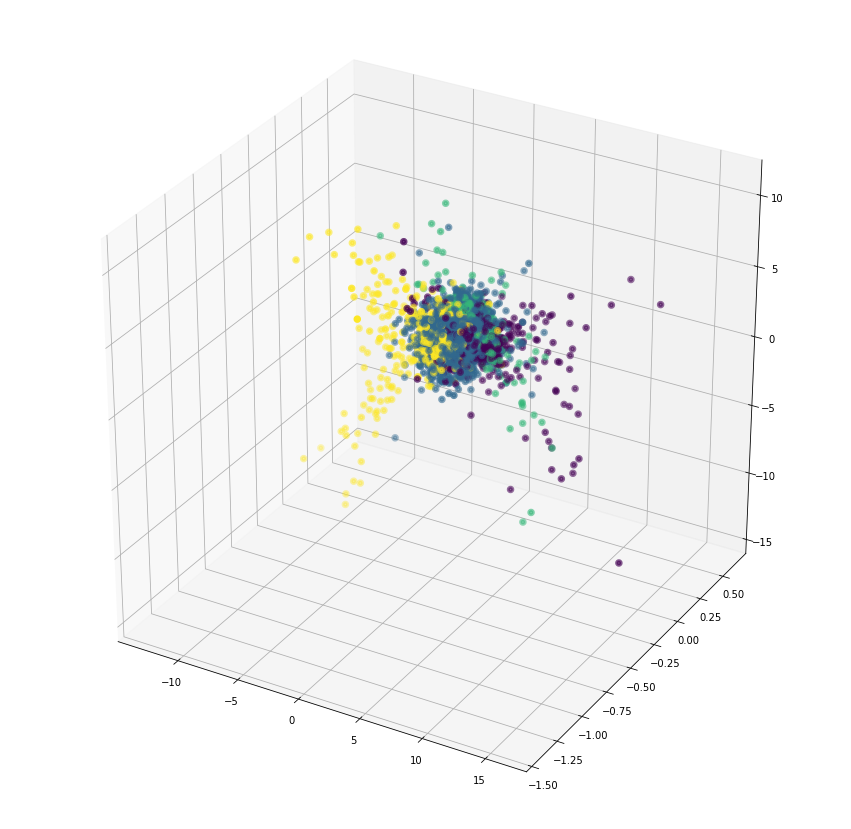

In [55]:
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

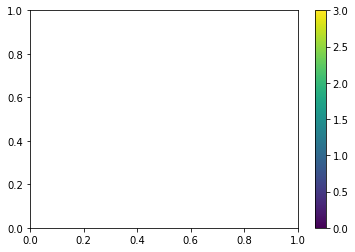

In [59]:
# když přidám colorbar k obrázku tak se nehezky deformuje, tak je tady zvlášť
plt.colorbar(sc, shrink=1)

In [45]:
test.y

tensor([1., 1., 1.,  ..., 3., 1., 0.])